# Getting a dataset to work with

The images we will use come from the [Hindi Devanagari script dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip), which is a collection of 46 different characters.

From phase 2, we are aware that the training dataset contains `1700 images` for each character, whereas the testing dataset only contains `300 images` for each character.

Since we need to test a variety of algorithms, I will only be using 10% of the training data in my models. It would take a very long time to test out different algorithms if we used the whole dataset.The dataset I'll be using, then, consists of `10% training` data and `100% test` data.

You can download the 10 % data from [here](https://github.com/Suraj124/Hindi_Character_Recognition/blob/main/Dataset/DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test.zip)


In [ ]:
# G-Drive Link for the data set : --> https://drive.google.com/file/d/1v8aVqHk3_LVeK_9_EilSVcgkZDlhdCDX/view?usp=sharing
# GitHub Link for the data set : --> https://github.com/Suraj124/Hindi_Character_Recognition/blob/main/Dataset/DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test.zip"

def get_ten_percent_dataset():

  import os
  from IPython.display import HTML

  if not os.path.exists("DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test.zip"):
    display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#ff0000;\">Dataset is not downloaded</h2><br>"))

    try:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Downloading the dataset...</h2><br>"))
      
      # https://medium.com/@acpanjan/download-google-drive-files-using-wget-3c2c025a8b99
      # You can refer the above blog how I download the dataset from G-Drive
      !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1v8aVqHk3_LVeK_9_EilSVcgkZDlhdCDX' -O DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test.zip

      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Dataset successfully downloaded 😃</h2><br>"))
      try:
        display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Unzipping the dataset...</h2><br></center>"))
    
        !unzip -q /content/DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test.zip

        display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Dataset successfully unzipped 😄</h2><br>"))
      except:
        display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#ff0000;\">Error!!! in Unzipping the dataset</h2><br>"))
    except:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#ff0000;\">Error!!! in downloading the dataset</h2><br>"))
  else:
    display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Dataset already exist... Skipping downloading.</h2><br>"))

In [ ]:
get_ten_percent_dataset()

--2022-09-30 08:14:31--  https://docs.google.com/uc?export=download&id=1v8aVqHk3_LVeK_9_EilSVcgkZDlhdCDX
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.102, 172.217.204.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/af1ainso5gkah78g55uujifjl71njrfg/1664525700000/06055040978356046403/*/1v8aVqHk3_LVeK_9_EilSVcgkZDlhdCDX?e=download&uuid=d0b3a658-0b08-46c7-b6b9-c66cc8128575 [following]
--2022-09-30 08:15:01--  https://doc-0g-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/af1ainso5gkah78g55uujifjl71njrfg/1664525700000/06055040978356046403/*/1v8aVqHk3_LVeK_9_EilSVcgkZDlhdCDX?e=download&uuid=d0b3a658-0b08-46c7-b6b9-c66cc8128575
Resolving doc-0g-a4-docs.googleusercontent.com (doc-0g-a4-docs.googleusercontent.com)... 74.125.196.132, 2607:f

In [ ]:
# Acquiring the necessary library and importing it
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [ ]:
pd.set_option('display.max_columns',1025)  # Display max Column upto 1025 in pandas DataFrame

In [ ]:
# Walk through the 10% train and 100% test data and count how many files are there.
for directory_path , directory_name , image_name in os.walk("DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test"):
  print(f"There are {len(directory_name)} directory and {len(image_name)} images in '{directory_path}'")

There are 2 directory and 0 images in 'DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test'
There are 46 directory and 0 images in 'DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test/Test'
There are 0 directory and 300 images in 'DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test/Test/character_27_ra'
There are 0 directory and 300 images in 'DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test/Test/character_4_gha'
There are 0 directory and 300 images in 'DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test/Test/character_25_ma'
There are 0 directory and 300 images in 'DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test/Test/character_9_jha'
There are 0 directory and 300 images in 'DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test/Test/character_18_da'
There are 0 directory and 300 images in 'DevanagariHandwrittenCharacterDataset_10_percent_train

As can be seen from the above, there are `170 images` of each character in the training data, and `300 images` in the test data.So, over all we have `7,820 images` in train data and `13,800 images` in test data

In [ ]:
def see_random_picture(target_dir , class_name , display_info = True , return_image_path = False , return_image_array=True):
  '''
  Display a random image from target_dir

  Parameters 
  ----------
  target_dir : Directory from where to pick the random image
  class_name : name of character class/directory
  display_info : Display shape and image (default=True)
  return_image_path : return the random image path (default=False)
  return_image_array : return the image array

  Return
  ---------
  Return the random image in array form 

  '''

  target_directory = target_dir + '/' + class_name                    # Example --> Train + '/' + character_1_ka  -->  Train/character_1_ka
  random_picture_name = random.choice(os.listdir(target_directory))   # Selecting random image from Train/character_1_ka
  image_path = target_directory + '/' + random_picture_name           # let say random image name is 10963.png , so final image path would be :
                                                                      #                                                     Train/character_1_ka/10963.png

  image = plt.imread(image_path) 

  if display_info:

    plt.figure(figsize=(2,2))
    print(f"Shape of image : {image.shape}")  #  display the shape of the image.
    plt.imshow(image , cmap='gray')
    plt.title(class_name)
    plt.axis("off")

  if return_image_path:
    return image_path
  elif return_image_array:
    return image

In [ ]:
# The names of each character, in the correct order for the Hindi Devnagri script
class_names='''character_1_ka character_2_kha character_3_ga character_4_gha character_5_kna character_6_cha character_7_chha 
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa 
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa 
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la 
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya 
character_35_tra character_36_gya digit_0 digit_1 digit_2 digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()

hindi_character = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह ॠ त्र ज्ञ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()                                                                                                        

In [ ]:
# Download Hindi Fonts to display is matplotlib plots
def get_hindi_fonts():

  if not os.path.exists("Nirmala.ttf"):
    print("Downloading Hindi fonts...")
    print("Downloading the Nirmala.tff ...")
    !wget https://www.wfonts.com/download/data/2016/04/29/nirmala-ui/nirmala-ui.zip
    !unzip -q nirmala-ui.zip

  else:   
    print("Nirmala.ttf already exist. Skipping downloading...")

get_hindi_fonts()

--2022-09-30 08:15:30--  https://www.wfonts.com/download/data/2016/04/29/nirmala-ui/nirmala-ui.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 686493 (670K) [application/octetstream]
Saving to: ‘nirmala-ui.zip’

nirmala-ui.zip      100%[===================>] 670.40K  --.-KB/s    in 0.1s    

2022-09-30 08:15:30 (4.41 MB/s) - ‘nirmala-ui.zip’ saved [686493/686493]



Shape of image : (32, 32)


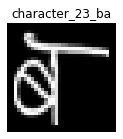

In [ ]:
# Let view any random character from train data
see_random_picture("DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test/Train",
                   random.choice(class_names),
                   display_info=True,
                   return_image_path=False,
                   return_image_array=False)

# Converting images to Vector

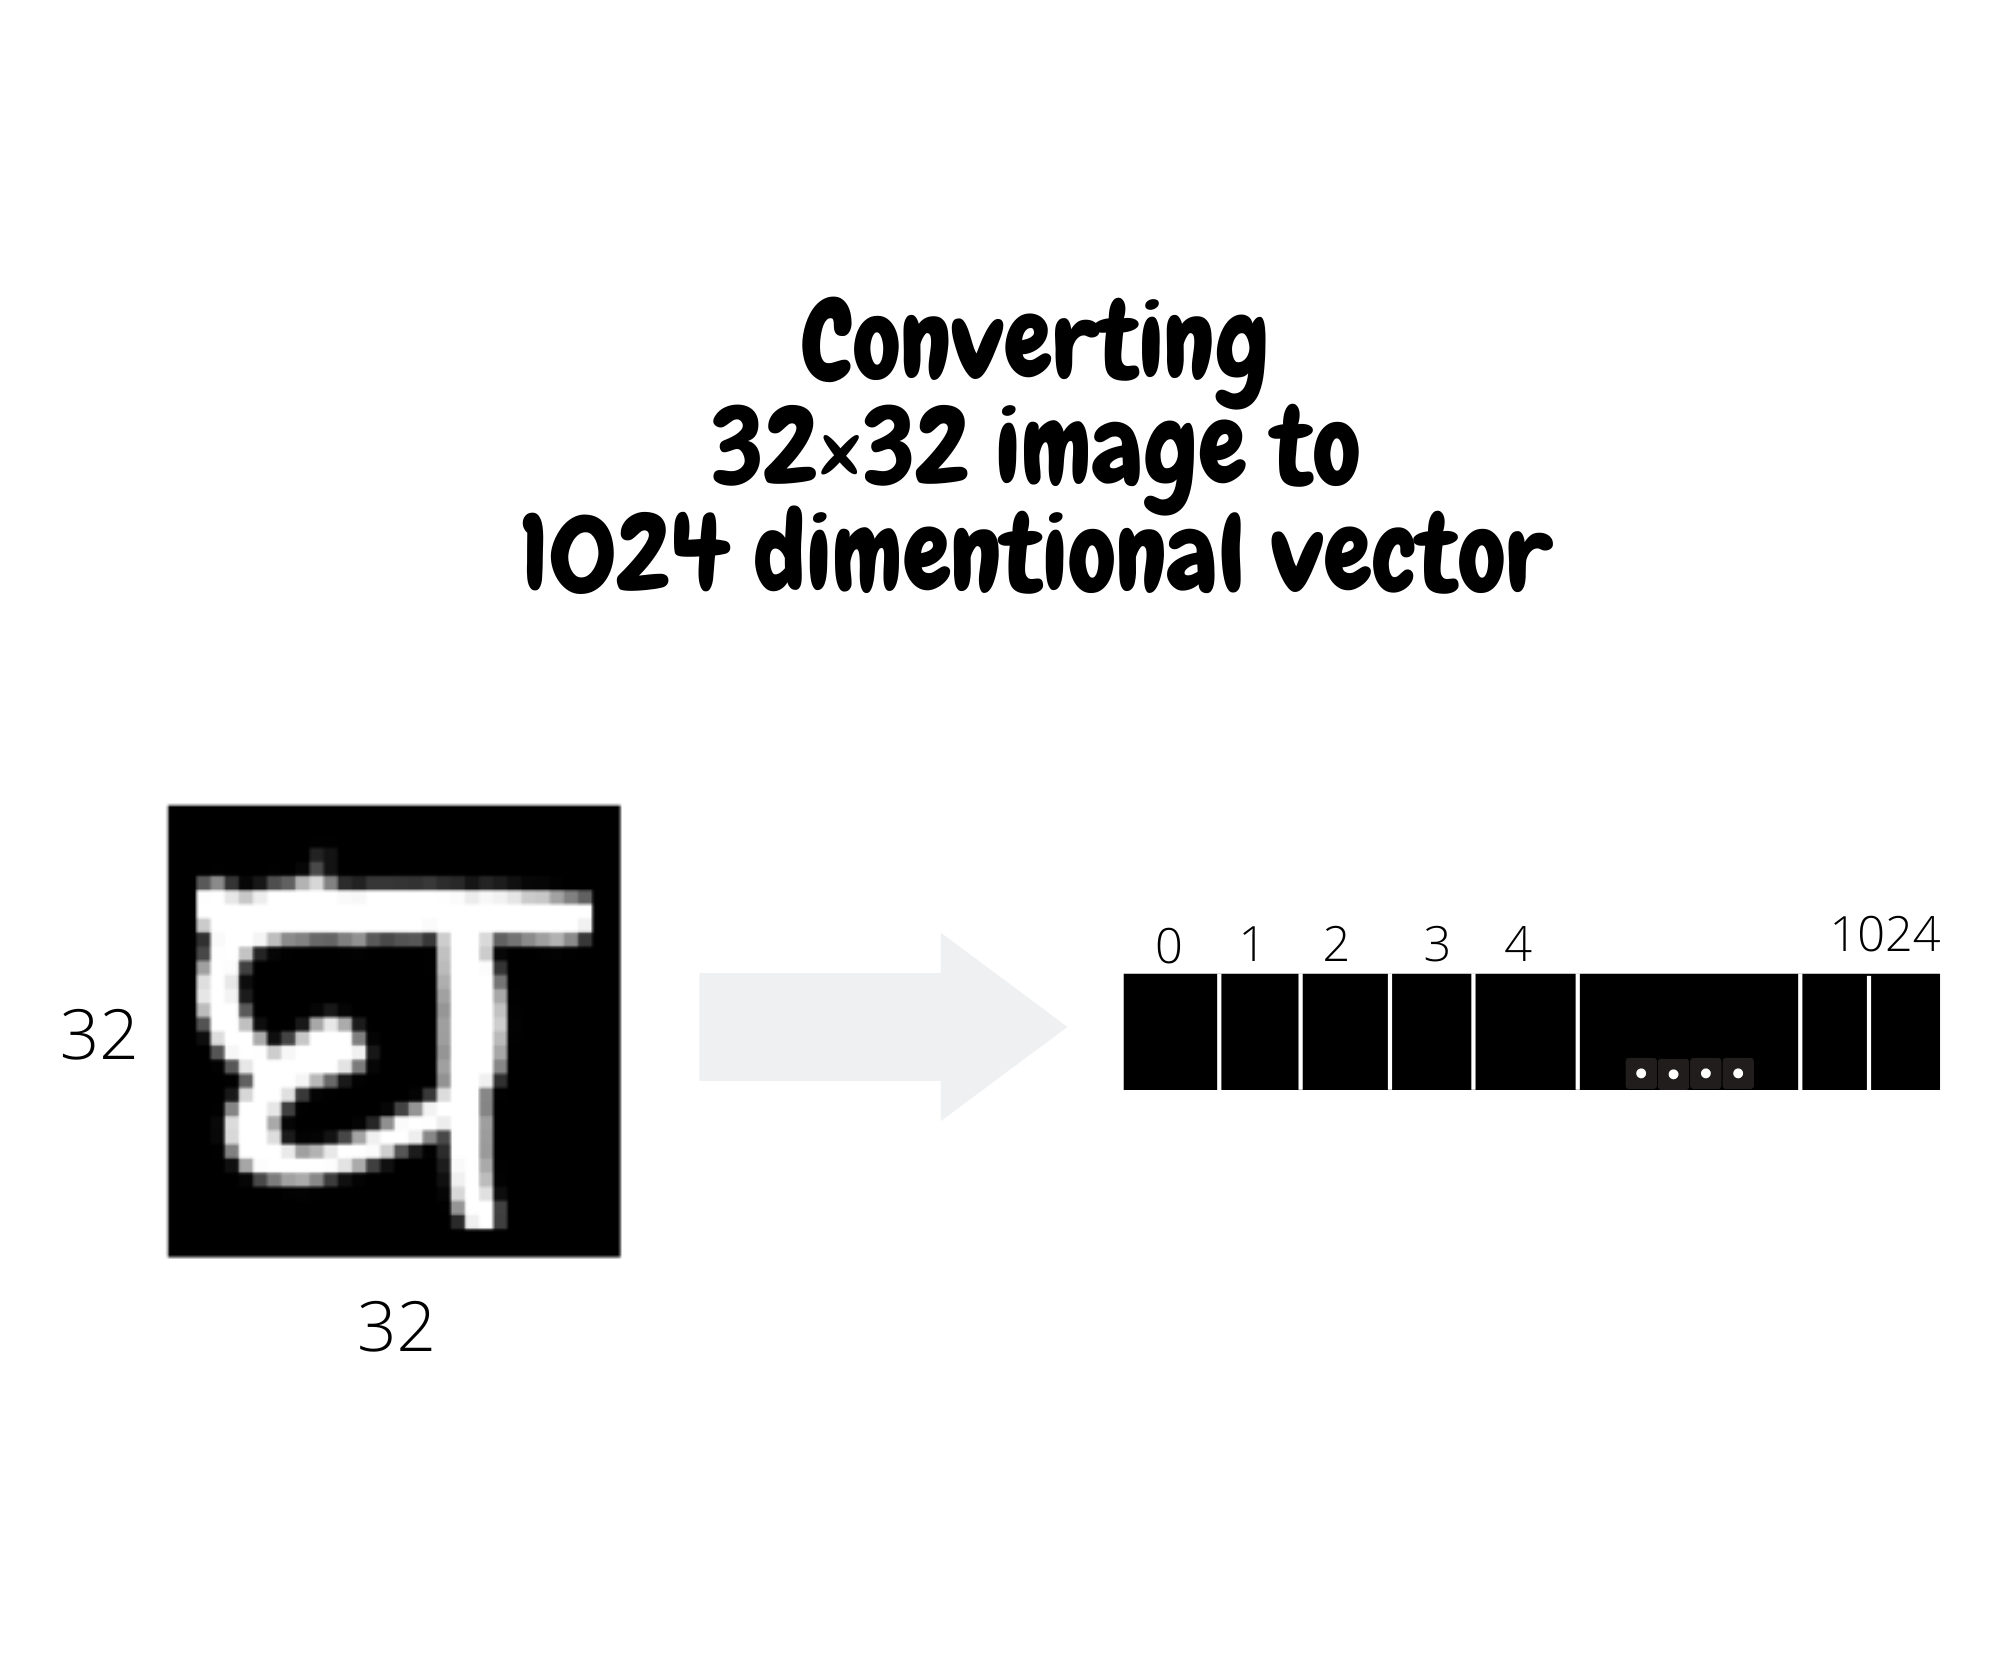

In [ ]:
from tqdm.notebook import tqdm
def read_image_from_directory(directory , class_names , shuffle = True , verbose = True):
  '''
  directory : This could be either Train or Test directory
  class_names : name of all the character class
  shuffle : Shuffle the dataframe
  verbose : print information if vebose is True

  Return
  -----------
  Return the dataframe, in each row first 1024 columns are for image vector and last column is the target class
  '''

  data = []
  for class_name_ in tqdm(class_names):
    if verbose:
      print(f"Converting images of {class_name_} to 1024 dimentional vector")
    target_directory = directory + '/' + class_name_
    random_picture_name = os.listdir(target_directory)

    for name in random_picture_name:           

      image_path = target_directory + '/' + name
      image = cv2.imread(image_path)[:,:,0]            # Read each image 
      image = image.reshape(-1)                        # Reshape each image to 1024 dimention
      image = np.concatenate([image,class_names.index(class_name_)],axis=None)   # concating 1024 dimention of image and the target class
      data.append(image)

  data = np.array(data).astype(int)
  df=pd.DataFrame(data=data)        # Convert the array to DataFrame

  if shuffle:
    df = df.sample(frac=1)

  df.rename(columns={1024:"Target_Class"},inplace=True)   # Change the last column name to target class

  print("DataFrame successfully created !!! ")
  return df

In [ ]:
# Lets first have the training images in dataframe

training_dataframe = read_image_from_directory(directory="DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test/Train",
                                               class_names=class_names,
                                               verbose=True)

  0%|          | 0/46 [00:00<?, ?it/s]

Converting images of character_1_ka to 1024 dimentional vector
Converting images of character_2_kha to 1024 dimentional vector
Converting images of character_3_ga to 1024 dimentional vector
Converting images of character_4_gha to 1024 dimentional vector
Converting images of character_5_kna to 1024 dimentional vector
Converting images of character_6_cha to 1024 dimentional vector
Converting images of character_7_chha to 1024 dimentional vector
Converting images of character_8_ja to 1024 dimentional vector
Converting images of character_9_jha to 1024 dimentional vector
Converting images of character_10_yna to 1024 dimentional vector
Converting images of character_11_taamatar to 1024 dimentional vector
Converting images of character_12_thaa to 1024 dimentional vector
Converting images of character_13_daa to 1024 dimentional vector
Converting images of character_14_dhaa to 1024 dimentional vector
Converting images of character_15_adna to 1024 dimentional vector
Converting images of charact

In [ ]:
# Check the shape
training_dataframe.shape

(7820, 1025)

In [ ]:
# View first 5 rows
training_dataframe

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Target_Class
5642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
7512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
1024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
7196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
4843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's check to see whether the dataframe that we just created is accurate or not using the following function
def display_random_images(data , class_names):
  plt.figure(figsize=(10,10))
  for i in range(9):
    plt.subplot(3,3,i+1)

    j = random.randint(0,data.shape[0])

    plt.imshow(data.iloc[j,0:1024].values.reshape(32,32),cmap='gray')
    plt.title(class_names[data.iloc[j,-1]])
    plt.axis(False)
  plt.show()

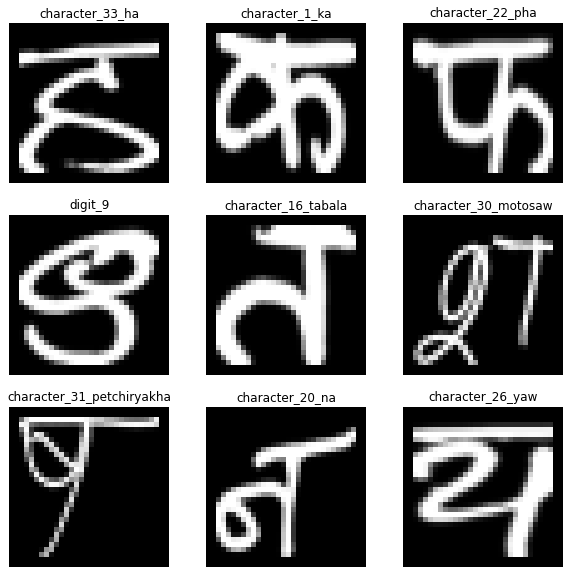

In [ ]:
# Display random images from train dataframe
display_random_images(training_dataframe,class_names)

It's fantastic Our finished dataframe is absolutely perfect.

In [ ]:
# Lets have the testing images in dataframe

testing_dataframe = read_image_from_directory(directory="DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test/Test",
                                              class_names=class_names,
                                              verbose=False,
                                              shuffle=False)

  0%|          | 0/46 [00:00<?, ?it/s]

DataFrame successfully created !!! 


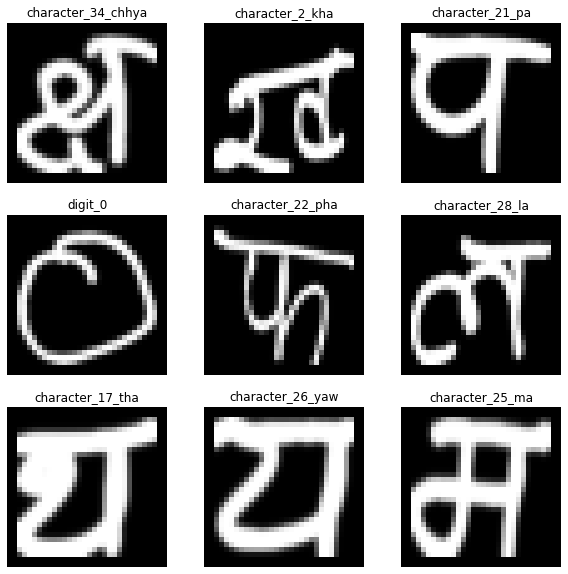

In [ ]:
# Display random images from test dataframe
display_random_images(training_dataframe,class_names)

<h2>Great !!! Everything is ready and working perfectly, we are all set, and we can begin building our models right away.</h2>


In [ ]:
# Install optuna for Hyperparameter tunning
!pip install -q optuna

     |████████████████████████████████| 308 kB 21.2 MB/s 
     |████████████████████████████████| 209 kB 47.9 MB/s 
     |████████████████████████████████| 81 kB 9.1 MB/s 
     |████████████████████████████████| 78 kB 5.0 MB/s 
     |████████████████████████████████| 112 kB 23.9 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 147 kB 71.2 MB/s 


In [ ]:
# Importing the required library for Modeling
import optuna
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from tqdm.notebook import tqdm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
# Split the train and test data in feature matrix and target variable
X_train , y_train = training_dataframe.iloc[:,0:1024].values , training_dataframe.iloc[:,-1].values
X_test , y_test  = testing_dataframe.iloc[:,0:1024].values , testing_dataframe.iloc[:,-1].values

In [ ]:
print(f"Shape of X_train  :  {X_train.shape}")
print(f"Shape of y_train  :  {y_train.shape}")
print("*"*40)
print(f"Shape of X_test :  {X_test.shape}")
print(f"Shape of y_test  :  {y_test.shape}")

Shape of X_train  :  (7820, 1024)
Shape of y_train  :  (7820,)
****************************************
Shape of X_test :  (13800, 1024)
Shape of y_test  :  (13800,)


In [ ]:
# When features are similar in scale, machine learning algorithms perform better.
# StandardScaler results in a distribution with mean 0 and standard deviation equal to 1
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
# Scaling the values between 0 and 1
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)

In [ ]:
# Reducing the number of dimensions
pca = PCA(0.95)   # Value of 0.95 indicates that we aim to maintain 95% of original information while reducing the dimensions of dataset
X_train_pca = pca.fit_transform(X_train_ss)
X_test_pca = pca.transform(X_test_ss)

# Model 1 : ----> KNN

`KNearestNeibhours` will be the first model we make.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Lets first try KNN with default parameters
model_1_1 = OneVsRestClassifier(KNeighborsClassifier())   # For Multi-Class Classification we will use OneVsRestClassifier

model_1_1.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
predictions_1_1 = model_1_1.predict(X_test)  

In [ ]:
def find_accuracy_precision_recall_f1(y_true,y_pred):
  '''
  Parameters
  ------------
  y_true :  Actual labels of images 
  y_pred :  Predicted labels of images

  Return 
  ------------
  Return accuracy , precision , recall and f1 Score
  '''
  accuracy = accuracy_score(y_true,y_pred)
  precision , recall , f1 , _ = precision_recall_fscore_support(y_true,y_pred , average='weighted')

  return {
      'accuracy' : accuracy,
      'precision' : precision,
      'recall' : recall,
      'f1' : f1
  }

In [ ]:
model_1_1_results = find_accuracy_precision_recall_f1(y_test,predictions_1_1)
model_1_1_results

{'accuracy': 0.7579710144927536,
 'f1': 0.7590541191722618,
 'precision': 0.7750374237296176,
 'recall': 0.7579710144927536}

We are able to achieve an accuracy of `75%` by leaving the parameters as they are. Also, let's try KNN with the default settings applied to the `pca data`.

In [ ]:
model_1_3 = OneVsRestClassifier(KNeighborsClassifier()) 
model_1_3 = model_1_3.fit(X_train_pca,y_train)

predictions_1_3 = model_1_3.predict(X_test_pca) 
model_1_3_results = find_accuracy_precision_recall_f1(y_test,predictions_1_3)
model_1_3_results

{'accuracy': 0.7570289855072464,
 'f1': 0.7577735783878409,
 'precision': 0.7718032360766431,
 'recall': 0.7570289855072464}

Very similar to the accuracy, we get from the original data. Let's use pca data to do some hyperparameter tuning in order to determine the optimal values for our KNN model.

### Hyperparameter Tunning

In [ ]:
# Let's do some hyperparameter tunning using Optuna on PCA data with 170 dimenstions

def objective(trial):

    n_neighbors = trial.suggest_int("n_neighbors", 1, 10)
    weights = trial.suggest_categorical("weights", ['uniform', 'distance'])

    model = OneVsRestClassifier(KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights
    ))

    score = cross_val_score(model, X_train_pca, y_train, cv=3)
    accuracy = score.mean()
    return accuracy
    
study = optuna.create_study(
    direction="maximize",
)

study.optimize(objective, n_trials=10)

[I 2022-07-30 06:12:08,380] A new study created in memory with name: no-name-5bf9298f-c78a-4e4c-a6f6-c970aa17b6bd
[I 2022-07-30 06:12:46,982] Trial 0 finished with value: 0.7423269484335963 and parameters: {'n_neighbors': 1, 'weights': 'distance'}. Best is trial 0 with value: 0.7423269484335963.
[I 2022-07-30 06:13:26,861] Trial 1 finished with value: 0.7423269484335963 and parameters: {'n_neighbors': 1, 'weights': 'uniform'}. Best is trial 0 with value: 0.7423269484335963.
[I 2022-07-30 06:14:28,003] Trial 2 finished with value: 0.6928394861110988 and parameters: {'n_neighbors': 8, 'weights': 'uniform'}. Best is trial 0 with value: 0.7423269484335963.
[I 2022-07-30 06:15:06,779] Trial 3 finished with value: 0.7423269484335963 and parameters: {'n_neighbors': 1, 'weights': 'distance'}. Best is trial 0 with value: 0.7423269484335963.
[I 2022-07-30 06:16:08,490] Trial 4 finished with value: 0.7241693777001781 and parameters: {'n_neighbors': 8, 'weights': 'distance'}. Best is trial 0 with 

In [ ]:
study.best_params

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
model_1_2 = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4,weights='distance')) 
model_1_2 = model_1_2.fit(X_train_pca,y_train)

predictions_1_2 = model_1_2.predict(X_test_pca) 
model_1_2_results = find_accuracy_precision_recall_f1(y_test,predictions_1_2)
model_1_2_results

{'accuracy': 0.7867391304347826,
 'f1': 0.787699306899854,
 'precision': 0.7958861370765928,
 'recall': 0.7867391304347826}

Excellent, with a roughly `3 % improvement in accuracy` from hyperparameter tuning.Finally we achieve `78 % accuracy`

### Finding the wrong predictions

Where the model is confused

In [ ]:
model_1_df = testing_dataframe.copy()     # Copy the testting dataframe
model_1_df['Predicted_Class'] = predictions_1_2  # Make new column for predicted class of test images
pd.set_option("display.max_columns")
model_1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Get all the wrong predictions
wrong_df = model_1_df[model_1_df['Target_Class']!=model_1_df['Predicted_Class']]
wrong_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24


In [ ]:
wrong_df.shape

(2943, 1026)

There are `2,943` images out of `13,800` test images for which the predictions are incorrect.

Let's examine the top one hundred incorrectly predicted images.

In [ ]:
wrong_100_df = wrong_df.sample(frac=1)[:100]   # Shuffle the DataFrame and select 100 rows

In [ ]:
def display_wrong_predictions(data):

  from pathlib import Path 
  from matplotlib.font_manager import FontProperties
  
  hindi_font = FontProperties(fname=Path('/content/Nirmala.ttf'))

  plt.figure(figsize=(23,30))
  for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(data.iloc[i,0:1024].values.reshape(32,32),cmap='gray')
    plt.title(f"Actual Class : {hindi_character[data.iloc[i,-2]]}\nPredicted Class : {hindi_character[data.iloc[i,-1]]}",fontproperties=hindi_font,fontsize=13)
    plt.axis("off")

Nirmala.ttf already exist. Skipping downloading...


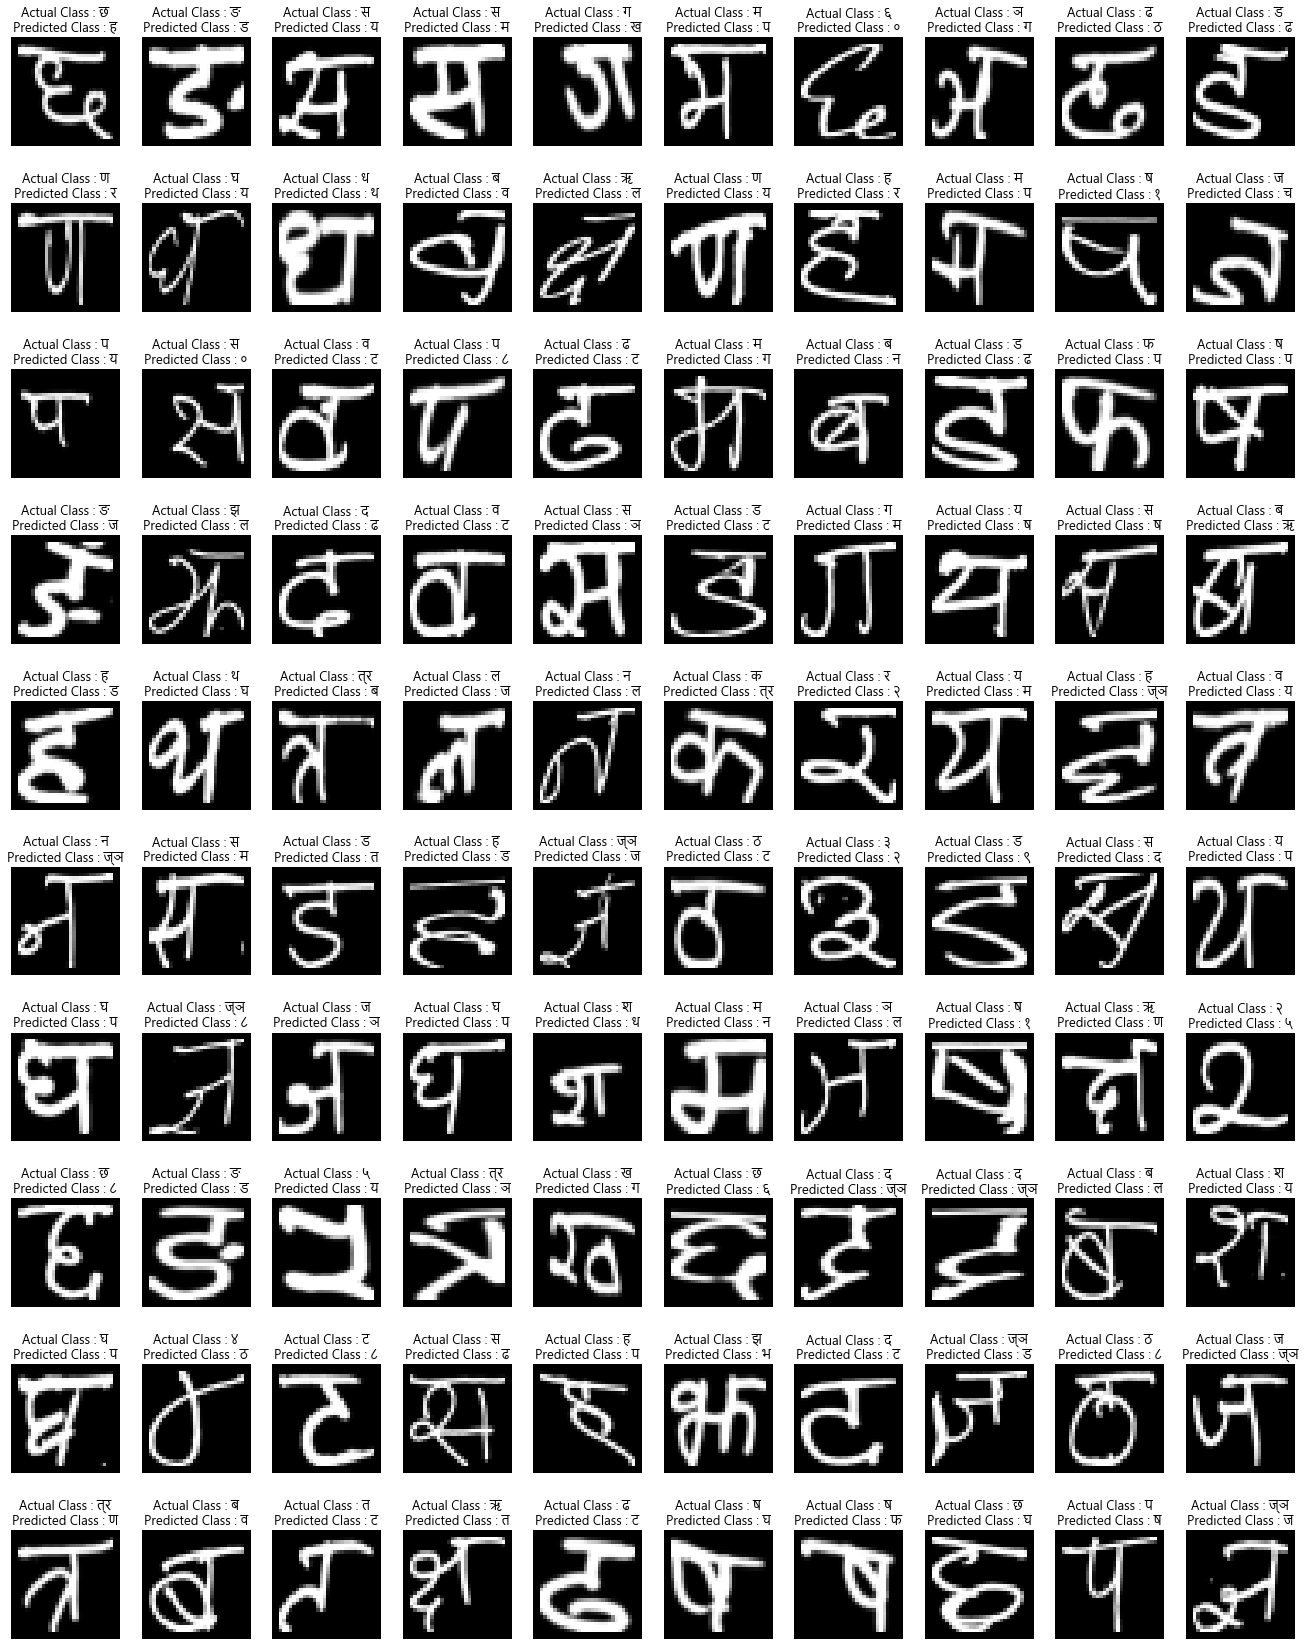

In [ ]:
display_wrong_predictions(wrong_100_df)

From above we can see that :

छ is confused with ह <br> 
म is confused with प <br>
ब is cinfused with व <br>
प is confused with ष <br>
ढ is cinfused with ट <br>
छ is confused with ६ <br>

There is some similarity between these characters, which may be confusing the model.
We can improve the accuracy of model if we provide more data to learn



#Model 2 : ----> SVC

Support Vector Classifier (SVC) is going to be the second model that we are going to work on.

In [ ]:
from sklearn.svm import SVC

In [ ]:
# SVC with Default parameters on pca data with 170 dimentions
model_2_1 = SVC()
model_2_1.fit(X_train_pca, y_train)

predictions_2_1 = model_2_1.predict(X_test_pca)
model_2_1_results = find_accuracy_precision_recall_f1(y_test,predictions_2_1)
model_2_1_results

{'accuracy': 0.8396376811594203,
 'f1': 0.84010371662871,
 'precision': 0.8424733743330222,
 'recall': 0.8396376811594203}

We get an accuracy of approximately `84 percent` with the default parameters, which is a significant improvement over our model 1.

### Hyperparameter Tunning

In [ ]:
# Let's do some hyperparameter tunning using Optuna on PCA data with 170 dimenstions
def objective(trial):

    svc_C = trial.suggest_float("svc_C",0.1,1000)
    svc_gamma = trial.suggest_float("svc_gamma",0.0001,1)
    svc_kernal = trial.suggest_categorical("svc_kernel",['rbf','poly']) 
    model = SVC(
        C=svc_C,
        gamma=svc_gamma,
        kernel = svc_kernal
    )  
    score = cross_val_score(model, X_train_pca, y_train, cv=3)
    accuracy = score.mean()
    return accuracy
search_space ={
         'svc_C': [0.1, 1, 10, 100, 1000],
         'svc_gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'svc_kernel': ['rbf','poly']
}
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.GridSampler(search_space)
)
study.optimize(objective)

[I 2022-07-30 12:24:18,451] A new study created in memory with name: no-name-a180d6e9-7fcf-47dd-bb58-cda822c232c0
[I 2022-07-30 12:24:39,243] Trial 0 finished with value: 0.8143222936300255 and parameters: {'svc_C': 1000, 'svc_gamma': 0.001, 'svc_kernel': 'poly'}. Best is trial 0 with value: 0.8143222936300255.
[I 2022-07-30 12:25:04,655] Trial 1 finished with value: 0.21994393354059946 and parameters: {'svc_C': 1, 'svc_gamma': 1, 'svc_kernel': 'rbf'}. Best is trial 0 with value: 0.8143222936300255.
[I 2022-07-30 12:25:33,506] Trial 2 finished with value: 0.032480884895468576 and parameters: {'svc_C': 1, 'svc_gamma': 0.1, 'svc_kernel': 'rbf'}. Best is trial 0 with value: 0.8143222936300255.
[I 2022-07-30 12:26:01,939] Trial 3 finished with value: 0.5212283908476726 and parameters: {'svc_C': 1000, 'svc_gamma': 0.01, 'svc_kernel': 'rbf'}. Best is trial 0 with value: 0.8143222936300255.
[I 2022-07-30 12:26:29,291] Trial 4 finished with value: 0.06956397671106668 and parameters: {'svc_C': 

In [ ]:
study.best_params

{'svc_C': 1000, 'svc_gamma': 0.001, 'svc_kernel': 'rbf'}

In [ ]:
# SVC with tunned hyperparameter on pca data
model_2_2 = SVC(C=1000 , gamma=0.001 , kernel='rbf',probability=True)
model_2_2.fit(X_train_pca, y_train)

predictions_2_2 = model_2_2.predict(X_test_pca)
model_2_2_results = find_accuracy_precision_recall_f1(y_test,predictions_2_2)
model_2_2_results

{'accuracy': 0.8615942028985507,
 'f1': 0.8617538286966766,
 'precision': 0.8627457111099781,
 'recall': 0.8615942028985507}

Excellent, with a gain in accuracy of approximately `3%` thanks to the tweaking of the hyperparameters.

Now the accuracy of SVC model is `86 %` 

In [ ]:
# Let's additionally keep track of the likelihood of each outcome for each prediction. 
model_2_pred_probs=model_2_2.predict_proba(X_test_pca)
model_2_pred_probs = np.max(model_2_pred_probs,axis=1)

In [ ]:
model_2_pred_probs.shape

(13800,)

### Finding the most wrong predictions

In [ ]:
model_2_df=testing_dataframe.copy()
model_2_df['Predicted_Class'] = predictions_2_2
model_2_df['Prediction_Confidence'] = model_2_pred_probs
pd.reset_option("display.max_columns")
model_2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.734075
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.951471
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.830329
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.749339
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.600867


In [ ]:
# Get all the wrong predictions
model_2_wrong_df = model_2_df[model_2_df['Target_Class']!=model_2_df['Predicted_Class']]
model_2_wrong_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24,0.353404
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21,0.512805
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22,0.381337
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22,0.554013
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29,0.291036


### Get top 20 wrong prediction with high probabilty

In [ ]:
wrong_20_df=model_2_wrong_df.sort_values(by='Prediction_Confidence',ascending=False)[:20] # Sort the DataFrame in descending order of Probability Score and selcted top 20 rows
wrong_20_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
8191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27,7,0.991185
2608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,21,0.970042
8265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27,15,0.966531
4098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,17,0.964758
1300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,12,0.962515


In [ ]:
def display_wrong_predictions(data,subplots=(10,10),figsize=(10,10),show_probability_score=False,fontsize=15):
  '''
  data : data to be displayed
  subplots : number of plots to create in row and columns wise
  figsize : size of the figure
  show_probability_score : Display the Confidence of predicted class
  fontsize : Size of the title

  '''
  from matplotlib.font_manager import FontProperties
  from pathlib import Path 
  
  hindi_font = FontProperties(fname=Path('/content/Nirmala.ttf'))

  plt.figure(figsize=figsize)

  for i in range(subplots[0]*subplots[1]):
    plt.subplot(subplots[0],subplots[1],i+1)
    plt.imshow(data.iloc[i,0:1024].values.reshape(32,32),cmap='gray')

    if show_probability_score:
      plt.title(f"Actual Class : {hindi_character[data.iloc[i,1024]]}\nPredicted Class : {hindi_character[data.iloc[i,1025]]}\nConfidence : {data.iloc[i,1026]*100:.2f} %",
                 fontproperties = hindi_font , fontsize = fontsize , color='red')
    else:
      plt.title(f"Actual Class : {hindi_character[data.iloc[i,1024]]}\nPredicted Class : {hindi_character[data.iloc[i,1025]]}",
                 fontproperties = hindi_font , fontsize = fontsize , color='red')
    plt.axis("off")

Nirmala.ttf already exist. Skipping downloading...


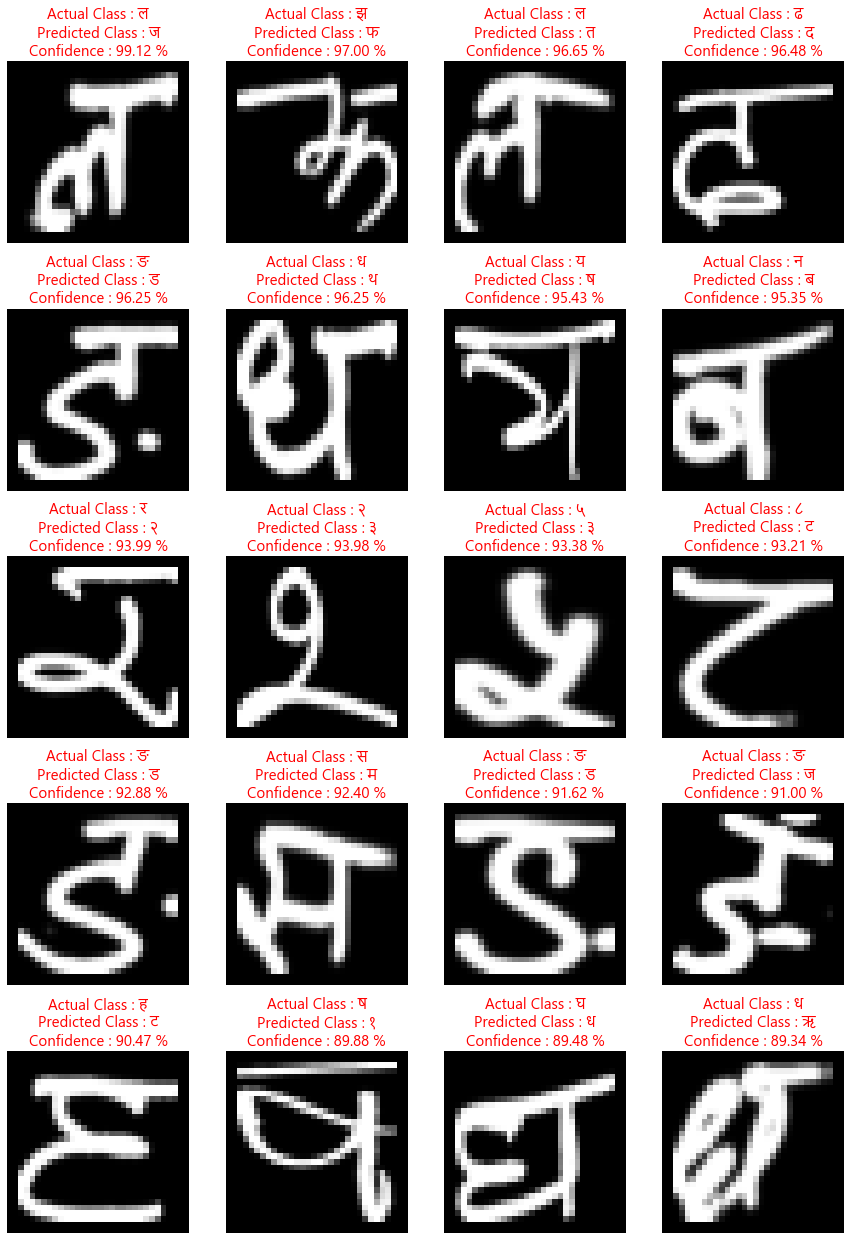

In [ ]:
display_wrong_predictions(data=wrong_20_df,
                          subplots=(5,4),
                          figsize=(15,22),
                          show_probability_score=True,
                          fontsize=15)

We can see from above that the model is most confused about between :
 - ल and ज 
 - झ and फ 
 - ल and त 
 - ढ and द 
 - घ and ध

Because we have only contributed 10 % toward the model's training, it is highly possible that there will be confusion.

More information must be provided to the model in order for it to acquire a more nuanced understanding of each character.


# Model 3 : ----> Random Forest


The third model will be constructed using Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest with Standardized data(applied StandardScaler() to data) having 1024 dimentions
model_3_1 = RandomForestClassifier()
model_3_1.fit(X_train_ss, y_train)

predictions_3_1 = model_3_1.predict(X_test_ss)
model_3_1_results = find_accuracy_precision_recall_f1(y_test,predictions_3_1)  
model_3_1_results

{'accuracy': 0.7826811594202898,
 'f1': 0.7808485095250507,
 'precision': 0.7844424924792245,
 'recall': 0.7826811594202898}

In [ ]:
# Random Forest with PCA data having 170 dimentions
model_3_2 = RandomForestClassifier()
model_3_2.fit(X_train_pca, y_train)

predictions_3_2 = model_3_2.predict(X_test_pca)
model_3_2_results = find_accuracy_precision_recall_f1(y_test,predictions_3_2)  
model_3_2_results

{'accuracy': 0.6702173913043479,
 'f1': 0.6654967642951656,
 'precision': 0.6696297101231977,
 'recall': 0.6702173913043479}

It has come to our attention that Random Forest performs more effectively with scaled data, and that when the dimension size was decreased, its accuracy suffered.

### Hyperparameter Tunning

In [ ]:
# Use Optuna to fine-tune the Random Forest's hyperparameters on scaled data having 1024 dimensions
def objective(trial):

    rf_n_estimators = trial.suggest_int("rf_n_estimators", 50, 500)
    rf_criterion = trial.suggest_categorical("rf_criterion", ['gini', 'entropy'])
    # rf_max_depth = trial.suggest_int("rf_max_depth", 1, 5)
    
    model = RandomForestClassifier(
        n_estimators=rf_n_estimators,
        criterion=rf_criterion,
        # max_depth=rf_max_depth
    )

    score = cross_val_score(model, X_train_ss, y_train, cv=3)
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.RandomSampler(),
)


study.optimize(objective,n_trials=20)

[I 2022-08-01 11:44:18,727] A new study created in memory with name: no-name-dc147fed-573f-465d-bbc7-c8066b8c7a4b
[I 2022-08-01 11:44:33,876] Trial 0 finished with value: 0.7136817920306852 and parameters: {'rf_n_estimators': 62, 'rf_criterion': 'gini'}. Best is trial 0 with value: 0.7136817920306852.
[I 2022-08-01 11:51:11,796] Trial 1 finished with value: 0.774808373033501 and parameters: {'rf_n_estimators': 439, 'rf_criterion': 'entropy'}. Best is trial 1 with value: 0.774808373033501.
[I 2022-08-01 11:57:12,037] Trial 2 finished with value: 0.7708437533087561 and parameters: {'rf_n_estimators': 404, 'rf_criterion': 'entropy'}. Best is trial 1 with value: 0.774808373033501.
[I 2022-08-01 12:01:09,043] Trial 3 finished with value: 0.7635551920891498 and parameters: {'rf_n_estimators': 266, 'rf_criterion': 'entropy'}. Best is trial 1 with value: 0.774808373033501.
[I 2022-08-01 12:01:35,866] Trial 4 finished with value: 0.7368286849571519 and parameters: {'rf_n_estimators': 112, 'rf_c

In [ ]:
study.best_params

{'rf_criterion': 'entropy', 'rf_n_estimators': 475}

In [ ]:
# Random Forest with Tuned Hyper Parameters Implemented on Scaled Data Consisting of 1024 Dimensions
model_3_3 = RandomForestClassifier(n_estimators=475,criterion='entropy')
model_3_3.fit(X_train_ss, y_train)

predictions_3_3 = model_3_3.predict(X_test_ss)
model_3_3_results = find_accuracy_precision_recall_f1(y_test,predictions_3_3)  
model_3_3_results

{'accuracy': 0.8140579710144927,
 'f1': 0.8132614084782924,
 'precision': 0.8176919166412181,
 'recall': 0.8140579710144927}

In [ ]:
# Get the prediction probability of each character in test data
model_3_pred_probs = model_3_3.predict_proba(X_test_ss)
model_3_pred_probs = np.max(model_3_pred_probs,axis=1)

### Finding the most wrong predictions

In [ ]:
model_3_df=testing_dataframe.copy()
model_3_df['Predicted_Class'] = predictions_3_3
model_3_df['Prediction_Confidence'] = model_3_pred_probs
pd.reset_option("display.max_columns")
model_3_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.252632
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.181053
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0.098947
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.431579
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.160000


In [ ]:
# Get all the wrong predictions
model_3_wrong_df = model_3_df[model_3_df['Target_Class']!=model_3_df['Predicted_Class']]
model_3_wrong_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0.098947
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,0.189474
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21,0.305263
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0.101053
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28,0.109474


In [ ]:
model_3_wrong_df.shape

(2538, 1027)

We have incorrectly predicted the class of 2538 images out of a total of 13800.

## Get top 10 wrong prediction with high probabilty

In [ ]:
wrong_10_df=model_3_wrong_df.sort_values(by='Prediction_Confidence',ascending=False)
wrong_10_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
8648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28,11,0.751579
9239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,30,37,0.688421
9069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,30,37,0.684211
9163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,30,37,0.663158
6073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20,37,0.627368


Nirmala.ttf already exist. Skipping downloading...


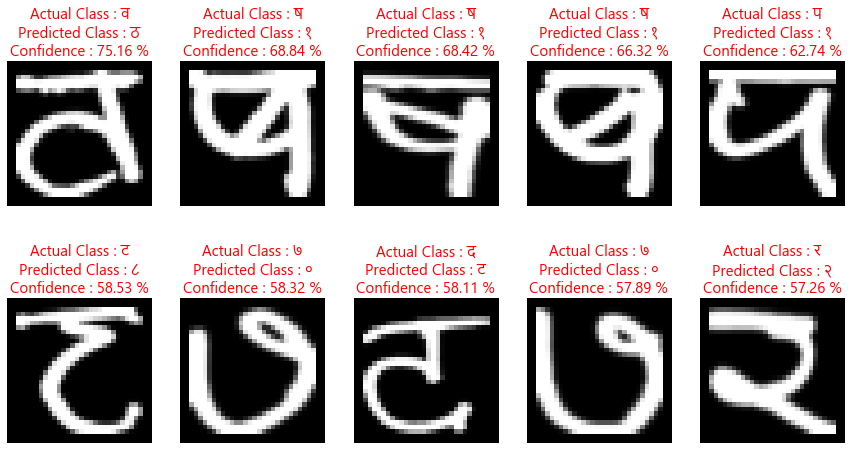

In [ ]:
display_wrong_predictions(data=wrong_10_df,
                          subplots=(2,5),
                          figsize=(15,8),
                          show_probability_score=True,
                          fontsize=15)

If you look at the picture closely, you can see why the model is getting these characters mixed up. Because of something about their appearance, whether it be their orientation or the way they are written, the model states that these characters are the same.

# Model 4 : ----> XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBoost with Default parameteres on scaled data
model_4_1 = XGBClassifier()
model_4_1.fit(X_train_ss,y_train)

predictions_4_1 = model_4_1.predict(X_test_ss)
model_4_1_results = find_accuracy_precision_recall_f1(y_test,predictions_4_1)            
model_4_1_results

{'accuracy': 0.7110869565217391,
 'f1': 0.7113530076534471,
 'precision': 0.7146623210332785,
 'recall': 0.7110869565217391}

In [ ]:
# XGBoost with Default parameteres on pca data
model_4_2 = XGBClassifier()
model_4_2.fit(X_train_pca,y_train)

predictions_4_2 = model_4_2.predict(X_test_pca)
model_4_2_results = find_accuracy_precision_recall_f1(y_test,predictions_4_2)   
model_4_2_results

{'accuracy': 0.6517391304347826,
 'f1': 0.6507200936252662,
 'precision': 0.654657137476874,
 'recall': 0.6517391304347826}

It has been observed that XGBoost does better on scaled data and that its accuracy drops off when the number of dimensions is reduced.

### Hyperparameter Tunning

In [ ]:
## Using Optuna to tune XGBoost on scaled data with 1024 dimensions

def objective(trial):
    # https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
    xgb_n_estimators = trial.suggest_int("n_estimators",100,500)
    # xgb_max_depth = trial.suggest_int("xgb_max_depth",4,6)
    # xgb_min_child_weight = trial.suggest_int("xgb_min_child_weight",4,6)

    model = XGBClassifier(learning_rate=0.1,
                          n_estimators=xgb_n_estimators,
                          # max_depth=xgb_max_depth,
                          # min_child_weight=xgb_min_child_weight,
                          subsample=0.8,
                          colsample_bytree=0.8)
  
    score = cross_val_score(model, X_train_ss, y_train, cv=3)
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.RandomSampler()
)
study.optimize(objective,n_trials=5)


[I 2022-08-02 13:24:32,420] A new study created in memory with name: no-name-1c9f1296-8989-4c03-9dc5-dcdbb18e7426
[I 2022-08-02 14:27:50,349] Trial 0 finished with value: 0.7246809193776755 and parameters: {'n_estimators': 249}. Best is trial 0 with value: 0.7246809193776755.
[I 2022-08-02 15:52:53,095] Trial 1 finished with value: 0.7304352480771067 and parameters: {'n_estimators': 340}. Best is trial 1 with value: 0.7304352480771067.
[I 2022-08-02 16:54:21,332] Trial 2 finished with value: 0.7242973367156119 and parameters: {'n_estimators': 247}. Best is trial 1 with value: 0.7304352480771067.


In [ ]:
# XGBoost with tunned hyper parameters
model_4_3 = XGBClassifier(n_estimators=340,subsample=0.8,colsample_bytree=0.8)
model_4_3.fit(X_train_ss,y_train)

predictions_4_3 = model_4_3.predict(X_test_ss)
model_4_3_results = find_accuracy_precision_recall_f1(y_test,predictions_4_3)
model_4_3_results

{'accuracy': 0.7805072463768116,
 'f1': 0.7812996657729167,
 'precision': 0.7840823199206013,
 'recall': 0.7805072463768116}

The accuracy of XGBoost was `71 percent` when the default parameters were used, but after tuning the hyperparameters, we achieved `78 percent accuracy.`

In [ ]:
#Let us calculate the probability score for each test image.
model_4_pred_probs = model_4_3.predict_proba(X_test_ss)
model_4_pred_probs = np.max(model_4_pred_probs,axis=1)

In [ ]:
model_4_pred_probs.shape

(13800,)

### Finding the most wrong predictions

In [ ]:
model_4_df=testing_dataframe.copy()
model_4_df['Predicted_Class'] = predictions_4_3
model_4_df['Prediction_Confidence'] = model_4_pred_probs
pd.reset_option("display.max_columns")
model_4_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.799387
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.964524
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.997095
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.997513
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.975507


In [ ]:
# Get all the wrong predictions
model_4_wrong_df = model_4_df[model_4_df['Target_Class']!=model_4_df['Predicted_Class']]
model_4_wrong_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,0.359144
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24,0.473690
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.663406
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21,0.345173
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0.367517


In [ ]:
model_4_wrong_df.shape

(3046, 1027)

We have incorrectly predicted the class of 3046 images out of a total of 13800.

In [ ]:
# Each class with thier number of wrong prediction
model_4_wrong_df['Target_Class'].value_counts()

25    115
24    113
31    108
22    106
28    102
6      95
16     94
3      92
23     90
32     88
17     87
2      87
18     85
1      82
12     80
4      80
5      74
26     73
34     72
19     71
29     70
35     69
33     68
20     65
13     65
8      64
30     60
21     60
14     60
9      59
15     56
0      53
39     50
11     47
10     46
42     46
41     44
27     43
38     43
7      39
44     33
45     32
40     30
43     28
37     20
36      2
Name: Target_Class, dtype: int64

### Get most wrong number of predictions

In [ ]:
print(f"From above we can see that most wrong predited class is 25 i.e {hindi_character[25]}")

From above we can see that most wrong predited class is 25 i.e य


In [ ]:
most_wrong_pred_class = model_4_wrong_df[model_4_wrong_df['Target_Class']==25] # Selecting the rows where target class is 25 i.e य
most_wrong_pred_class.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
7500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,30,0.596232
7501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,32,0.252516
7504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,28,0.477789
7505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,14,0.500689
7507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,20,0.724617


In [ ]:
# lets take top 10 with highest probability for class 25 ( य )
most_wrong_pred_class_25_top_10 = most_wrong_pred_class.sort_values(by="Prediction_Confidence",ascending=False)[:10]
most_wrong_pred_class_25_top_10

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,31,0.913282
7747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,16,0.874462
7745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,16,0.869318
7622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,14,0.865898
7516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,3,0.856916
7677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,30,0.820839
7736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,29,0.797130
7690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,28,0.733966
7787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,16,0.733659
7507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,20,0.724617


Nirmala.ttf already exist. Skipping downloading...


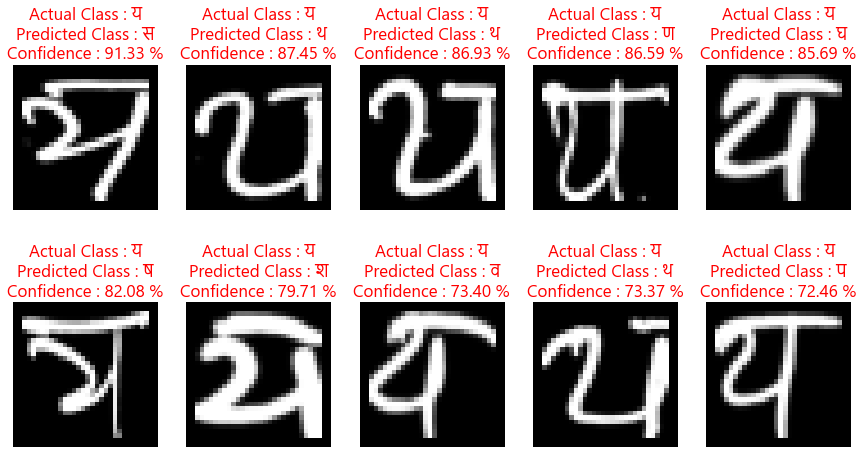

In [ ]:
display_wrong_predictions(data=most_wrong_pred_class_25_top_10,
                          subplots=(2,5),
                          figsize=(15,8),
                          show_probability_score=True,
                          fontsize=17)

It is clearly evident, as seen from above, that model is most confused with the class य

### Get 2nd most wrong number of predictions

In [ ]:
print(f"2nd most wrong predicted class is 24 i.e {hindi_character[24]}")

2nd most wrong predicted class is 24 i.e म


In [ ]:
# Lets also look at the 2nd most wrong prediction class
most_wrong_pred_class_24_top_10=model_4_wrong_df[model_4_wrong_df['Target_Class']==24].sort_values(by="Prediction_Confidence",ascending=False)[:10]
most_wrong_pred_class_24_top_10

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
7420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,19,0.957988
7285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,19,0.904453
7266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,29,0.860154
7491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,2,0.827394
7314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,0,0.799691
7258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,2,0.796811
7361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,31,0.768261
7427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,33,0.758573
7252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,30,0.726047
7437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,21,0.712890


Nirmala.ttf already exist. Skipping downloading...


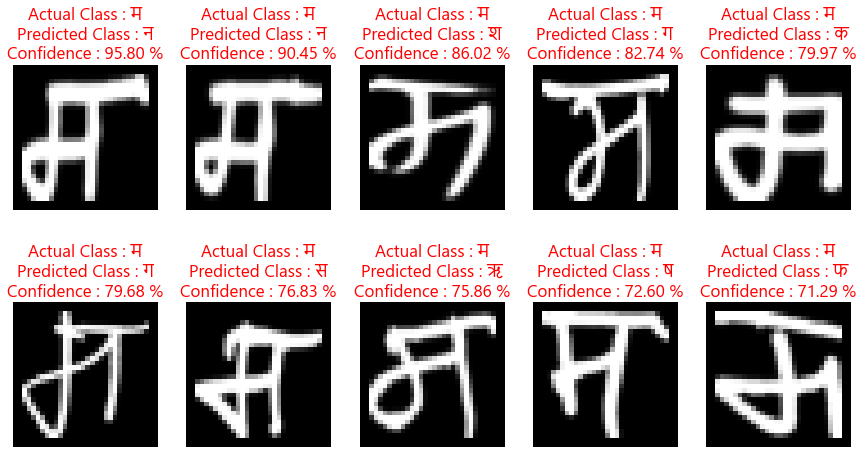

In [ ]:
display_wrong_predictions(data=most_wrong_pred_class_24_top_10,
                          subplots=(2,5),
                          figsize=(15,8),
                          show_probability_score=True,
                          fontsize=17)

If we provide more data, this error in prediction may be reduced.

# Selecting top 2 best Model

In [ ]:
model_name=[model_1_2_results,model_2_2_results,model_3_3_results,model_4_3_results] # model results with list of dictionaries
model_name

[{'accuracy': 0.7867391304347826,
  'f1': 0.787699306899854,
  'precision': 0.7958861370765928,
  'recall': 0.7867391304347826},
 {'accuracy': 0.8615942028985507,
  'f1': 0.8617538286966766,
  'precision': 0.8627457111099781,
  'recall': 0.8615942028985507},
 {'accuracy': 0.8140579710144927,
  'f1': 0.8132614084782924,
  'precision': 0.8176919166412181,
  'recall': 0.8140579710144927},
 {'accuracy': 0.7805072463768116,
  'f1': 0.7812996657729167,
  'precision': 0.7840823199206013,
  'recall': 0.7805072463768116}]

In [ ]:
model_accuracy=[]               # Store all the model's accuracy in single list
model_f1=[]                     # Store all the model's F1-Score in single list
model_precision=[]              # Store all the model's precision in single list
model_recall=[]                 # Store all the model's recall in single list
for model in model_name:
  model_accuracy.append(model['accuracy'])
  model_f1.append(model['f1'])
  model_precision.append(model['precision'])
  model_recall.append(model['recall'])


In [ ]:
# Create DataFrame having results of all 4 model's
all_model_results = pd.DataFrame(data={'All_Model_name':"Model_1_KNN Model_2_SVM Model_3_RandomForest Model_4_XGBoost".split(),
                                       'Model_Accuracy':model_accuracy,
                                       'Model_f1_Score':model_f1,
                                       'Model_Precision':model_precision,
                                       'Model_Recall':model_recall})
all_model_results

,All_Model_name,Model_Accuracy,Model_f1_Score,Model_Precision,Model_Recall
0,Model_1_KNN,0.786739,0.787699,0.795886,0.786739
1,Model_2_SVM,0.861594,0.861754,0.862746,0.861594
2,Model_3_RandomForest,0.814058,0.813261,0.817692,0.814058
3,Model_4_XGBoost,0.780507,0.781300,0.784082,0.780507


In [ ]:
# Sort the DataFrame in decending order of F1-Score
all_model_results = all_model_results.sort_values(by='Model_f1_Score',ascending=False)
all_model_results

,All_Model_name,Model_Accuracy,Model_f1_Score,Model_Precision,Model_Recall
1,Model_2_SVM,0.861594,0.861754,0.862746,0.861594
2,Model_3_RandomForest,0.814058,0.813261,0.817692,0.814058
0,Model_1_KNN,0.786739,0.787699,0.795886,0.786739
3,Model_4_XGBoost,0.780507,0.781300,0.784082,0.780507


As can be seen from the information presented above, `models 2 (SVM)` and `Model-3 (Random Forest)` are the best models in terms of having the `highest accuracy, f1-score, precision, and recall value`.

Let's use these two models in conjunction with the entire dataset. Previously, we have used only 10 percent of the data set, and the results that we are getting are kind of good. Let's use the entire dataset and see what happens.

# Get utility functions

In [ ]:
# Get the utility functions
import os
if not os.path.exists("utility_functions_hcr.py"):
  print("Downloading the utility functions")
  !wget https://raw.githubusercontent.com/Suraj124/Hindi_Character_Recognition/main/extras/utility_functions_hcr.py
else:
  print("Utility functions avilable. Skipping downloading...")

--2022-08-07 08:06:51--  https://raw.githubusercontent.com/Suraj124/Hindi_Character_Recognition/main/extras/utility_functions_hcr.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6480 (6.3K) [text/plain]
Saving to: ‘utility_functions_hcr.py’

utility_functions_h 100%[===================>]   6.33K  --.-KB/s    in 0s      

2022-08-07 08:06:51 (64.8 MB/s) - ‘utility_functions_hcr.py’ saved [6480/6480]



In [ ]:
from utility_functions_hcr import (see_random_picture,
                                    read_image_from_directory,
                                    display_random_images,
                                    find_accuracy_precision_recall_f1,
                                    display_wrong_predictions)

In [ ]:
get_hindi_fonts()   # To display actual Hindi Character 

Nirmala.ttf already exist. Skipping downloading...


# Get the full data

Link for the full dataset is [here](https://github.com/Suraj124/Hindi_Character_Recognition/blob/main/Dataset/DevanagariHandwrittenCharacterDataset.zip)

In [ ]:
#GDrive Link for the data set : --> https://drive.google.com/file/d/1FljXluMfKjGiQRJnz00ZGC6tVmaonos2/view?usp=sharing
#GitHub Link for the data set : --> https://github.com/Suraj124/Hindi_Character_Recognition/blob/main/Dataset/DevanagariHandwrittenCharacterDataset.zip
def get_full_dataset():

  import os
  import zipfile
  from IPython.display import HTML

  if not os.path.exists("DevanagariHandwrittenCharacterDataset.zip"):
    display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#ff0000;\">Dataset is not downloaded</h2><br>"))

    try:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Downloading the dataset...</h2><br>"))
      
      !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FljXluMfKjGiQRJnz00ZGC6tVmaonos2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FljXluMfKjGiQRJnz00ZGC6tVmaonos2" -O DevanagariHandwrittenCharacterDataset.zip && rm -rf /tmp/cookies.txt

      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Dataset successfully downloaded 😃</h2><br>"))
      try:
        display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Unzipping the dataset...</h2><br></center>"))
    
        !unzip -q /content/DevanagariHandwrittenCharacterDataset.zip

        display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Dataset successfully unzipped 😄</h2><br>"))
      except:
        display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#ff0000;\">Error!!! in Unzipping the dataset</h2><br>"))
    except:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#ff0000;\">Error!!! in downloading the dataset</h2><br>"))
  else:
    display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Dataset already exist... Skipping downloading.</h2><br>"))

In [ ]:
get_full_dataset()

--2022-08-07 08:07:06--  https://docs.google.com/uc?export=download&confirm=t&id=1FljXluMfKjGiQRJnz00ZGC6tVmaonos2
Resolving docs.google.com (docs.google.com)... 142.251.2.102, 142.251.2.101, 142.251.2.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bt0c4mish0an0fkbta8195q86ojen0bk/1659859575000/06055040978356046403/*/1FljXluMfKjGiQRJnz00ZGC6tVmaonos2?e=download&uuid=508e39d0-4255-4177-bde9-3c422ff6b603 [following]
--2022-08-07 08:07:06--  https://doc-0c-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bt0c4mish0an0fkbta8195q86ojen0bk/1659859575000/06055040978356046403/*/1FljXluMfKjGiQRJnz00ZGC6tVmaonos2?e=download&uuid=508e39d0-4255-4177-bde9-3c422ff6b603
Resolving doc-0c-a4-docs.googleusercontent.com (doc-0c-a4-docs.googleusercontent.com)... 142.250.141.132, 260

In [ ]:
# Acquiring the necessary library and importing it
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

From the **phase - 2** we already know in the **DevanagariHandwrittenCharacterDataset** directory there are two sub-directory i.e **Train and Test**. Within the Train directory, there are an additional 46 sub-directories for each character, with `1700 images` contained within each of those sub-directories.

There are 46 sub-directories for each character located within the test directory, and each character directory contains `300 images` for testing.

Finally, we ended up with `78,200 images` (1700 × 46), which are part of the **training data**, and `13,800 images` (300 × 46), which are part of the testing data.

Shape of image : (32, 32)
Shape of image : (32, 32)
Shape of image : (32, 32)
Shape of image : (32, 32)


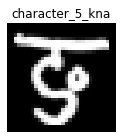

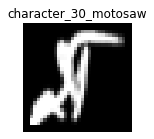

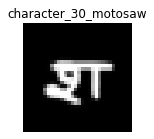

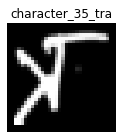

In [ ]:
# Lets view some random images from Train data
for i in range(4):
  see_random_picture(target_dir="/content/DevanagariHandwrittenCharacterDataset/Train",
                   class_name=random.choice(class_names),
                   return_image_array=False)

## Converting images to vector

In [ ]:
# Get the Training data 
train_data = read_image_from_directory(directory="/content/DevanagariHandwrittenCharacterDataset/Train",
                                       class_names=class_names,
                                       verbose=False)

  0%|          | 0/46 [00:00<?, ?it/s]

DataFrame successfully created !!! 


In [ ]:
# Get the testing data
test_data =  read_image_from_directory(directory="/content/DevanagariHandwrittenCharacterDataset/Test",
                                       class_names=class_names,
                                       verbose=False)

  0%|          | 0/46 [00:00<?, ?it/s]

DataFrame successfully created !!! 


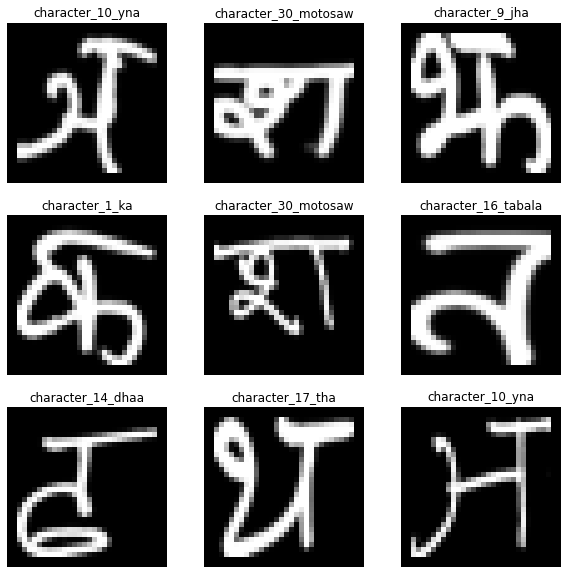

In [ ]:
# Lets check if the images vector are correctly encoded in Train DataFrame
display_random_images(train_data,class_names=class_names)

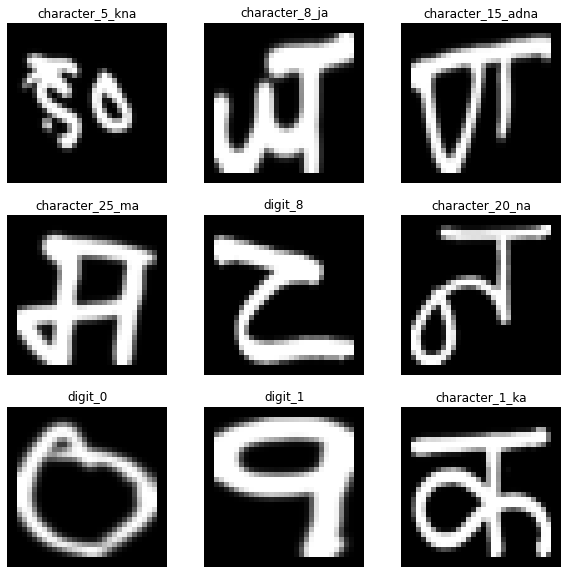

In [ ]:
# Lets check if the images vector are correctly encoded in Test DataFrame
display_random_images(test_data,class_names=class_names)

Great, it appears that both the training and testing sets of images have been appropriately encoded and tagged.

In [ ]:
X_train , y_train = train_data.iloc[:,0:1024].values , train_data.iloc[:,-1].values
X_test , y_test  = test_data.iloc[:,0:1024].values , test_data.iloc[:,-1].values

In [ ]:
print(f"Shape of X_train  :  {X_train.shape}")
print(f"Shape of y_train  :  {y_train.shape}")
print("*"*40)
print(f"Shape of X_test :  {X_test.shape}")
print(f"Shape of y_test  :  {y_test.shape}")

Shape of X_train  :  (78200, 1024)
Shape of y_train  :  (78200,)
****************************************
Shape of X_test :  (13800, 1024)
Shape of y_test  :  (13800,)


In [ ]:
# When features are similar in scale, machine learning algorithms perform better.
# StandardScaler results in a distribution with mean 0 and standard deviation equal to 1
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
# Scaling the values between 0 and 1
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)

In [ ]:
# Reducing the number of dimensions
pca = PCA(0.95)   # Value of 0.95 indicates that we aim to maintain 95% of original information while reducing the dimensions of dataset

X_train_pca = pca.fit_transform(X_train_ss)
X_test_pca = pca.transform(X_test_ss)

In [ ]:
X_train_pca.shape , X_test_pca.shape

((78200, 177), (13800, 177))

# Model : 5  ----> SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
# SVC with tunned hyperparameter
model_5_1 = SVC(C=1000 , gamma=0.001 , kernel='rbf',probability=True)
model_5_1.fit(X_train_pca, y_train)

predictions_5_1 = model_5_1.predict(X_test_pca)
model_5_1_results = find_accuracy_precision_recall_f1(y_test,predictions_5_1)
model_5_1_results

{'accuracy': 0.9634057971014492,
 'f1': 0.9634358037691071,
 'precision': 0.9635821476273805,
 'recall': 0.9634057971014492}

Amazingly, we were able to attain an accuracy rate of **`96 percent`**, which is a very acceptable accuracy rate.

In [ ]:
#Let us calculate the probability score for each test image.
model_5_pred_probs = model_5_1.predict_proba(X_test_pca)

In [ ]:
model_5_pred_probs = np.max(model_5_pred_probs,axis=1)

### Finding the most wrong predictions

In [ ]:
# Create a DataFrame having image vector , Target class , Predicted class and Prediction confidence 
model_5_df=test_data.copy()
model_5_df['Predicted_Class'] = predictions_5_1
model_5_df['Prediction_Confidence'] = model_5_pred_probs
pd.reset_option("display.max_columns")
model_5_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
12316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41,41,0.999823
5828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,19,19,0.633408
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,0.451395
1308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,0.998773
4692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,15,0.767895


In [ ]:
# Get all the wrong predictions
model_5_wrong_df = model_5_df[model_5_df['Target_Class']!=model_5_df['Predicted_Class']]
model_5_wrong_df

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,0.451395
869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0.308338
10372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,34,22,0.967217
2017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,3,0.419976
1649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,0.276241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,41,0.861819
13048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,43,41,0.436440
6697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,3,0.182023
9005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,30,37,0.141477


Only `505` out of a total of `13,800` test images were evaluated to be incorrect by model 5.

## Get the top 10 Wrong prediction with high probability

In [ ]:
wrong_10_df=model_5_wrong_df.sort_values(by='Prediction_Confidence',ascending=False)[:10]
wrong_10_df

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
5926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,19,15,0.998680
11697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,38,39,0.997073
1438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,12,0.994790
8225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27,7,0.991302
8350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27,15,0.991014
2702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,7,0.988867
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16,18,0.988303
8406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28,11,0.986942
5362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,17,35,0.984150
4130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,17,0.983547


Nirmala.ttf already exist. Skipping downloading...


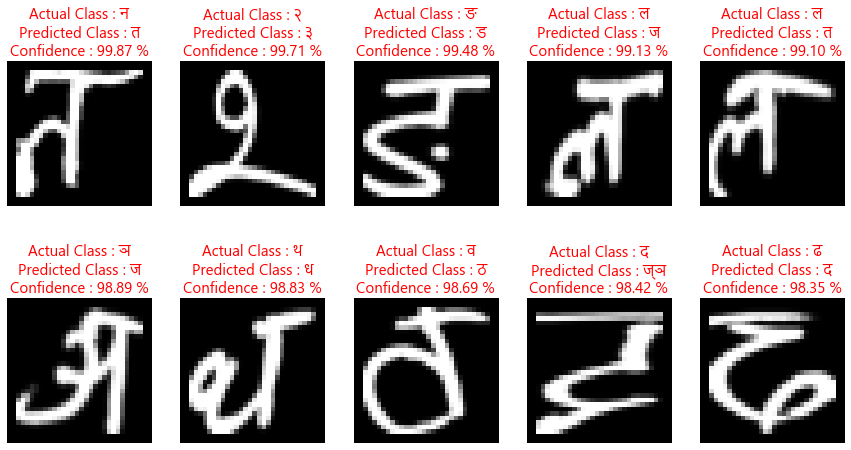

In [ ]:
display_wrong_predictions(data=wrong_10_df,
                          subplots=(2,5),
                          figsize=(15,8),
                          show_probability_score=True,
                          fontsize=15)

# Model 6 : ----> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest with Tuned Hyper Parameters 
model_6 = RandomForestClassifier(n_estimators=475,criterion='entropy')
model_6.fit(X_train_ss, y_train)

predictions_6 = model_6.predict(X_test_ss)
model_6_results = find_accuracy_precision_recall_f1(y_test,predictions_6)  
model_6_results

{'accuracy': 0.9265217391304348,
 'f1': 0.926443393763407,
 'precision': 0.9273604460915659,
 'recall': 0.9265217391304348}

In [ ]:
# Get the prediction probability of each character in test data
model_6_pred_probs = model_6.predict_proba(X_test_ss)
model_6_pred_probs = np.max(model_6_pred_probs,axis=1)

### Finding the most wrong predictions

In [ ]:
model_6_df=test_data.copy()
model_6_df['Predicted_Class'] = predictions_6
model_6_df['Prediction_Confidence'] = model_6_pred_probs
pd.reset_option("display.max_columns")
model_6_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
9923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,33,33,0.275789
12231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,40,0.983158
12647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,42,0.397895
9336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,31,31,0.124211
9949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,33,33,0.408421


In [ ]:
# Get all the wrong predictions
model_6_wrong_df = model_6_df[model_6_df['Target_Class']!=model_6_df['Predicted_Class']]
model_6_wrong_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
2053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,20,0.124211
5026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16,25,0.113684
4898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16,3,0.170526
4482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,20,0.458947
3116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,44,0.444211


In [ ]:
model_6_wrong_df.shape

(1014, 1027)

Only `1014` out of a total of `13,800` test images were evaluated to be incorrect by model 6.

## Get the top 10 Wrong prediction with high probability

In [ ]:
wrong_10_df=model_6_wrong_df.sort_values(by='Prediction_Confidence',ascending=False)[:10]
wrong_10_df

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Target_Class,Predicted_Class,Prediction_Confidence
5926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,19,15,0.717895
8406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28,11,0.694737
3274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,44,0.694737
8547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28,11,0.656842
3268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,44,0.644211
13345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44,14,0.644211
5373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,17,10,0.635789
1219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,12,0.612632
3703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,45,0.578947
1452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,12,0.574737


Nirmala.ttf already exist. Skipping downloading...


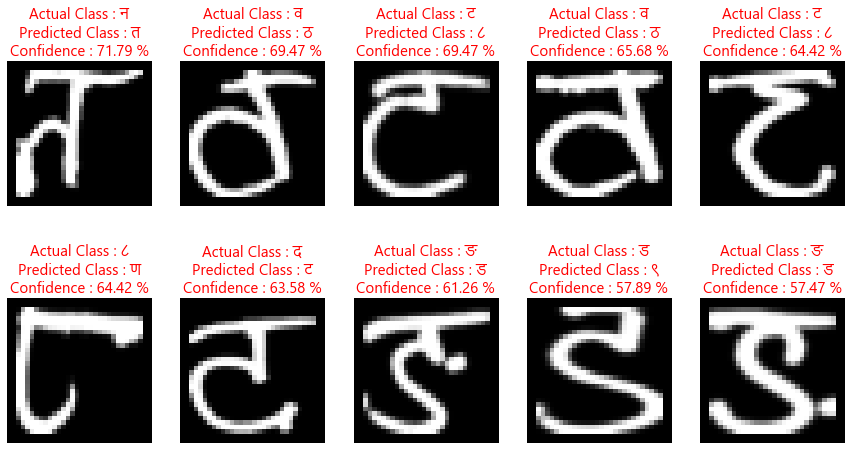

In [ ]:
display_wrong_predictions(data=wrong_10_df,
                          subplots=(2,5),
                          figsize=(15,8),
                          show_probability_score=True,
                          fontsize=15)

Therefore, in conclusion, with the assistance of a traditional machine learning algorithm, we were able to obtain an accuracy of `96%`; the algorithm that allowed us to accomplish this accuracy is the `Support Vector Classifier`.

In the next phase, which is `Phase-04`, we will experiment with several `Deep learning` techniques to see if we can improve upon this accuracy.